In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Сравнение рейтингов Fandango с рейтингами других компаний

Посмотреть, как рейтинги Fandango соотносятся с рейтингами других компаний.

In [2]:
# Загрузить данные в DataFrame из csv-файла
all_df = pd.read_csv('all_sites_scores.csv')
all_df.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709


In [3]:
# Считаем метрики для колонок с числами
all_df.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**Строим график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

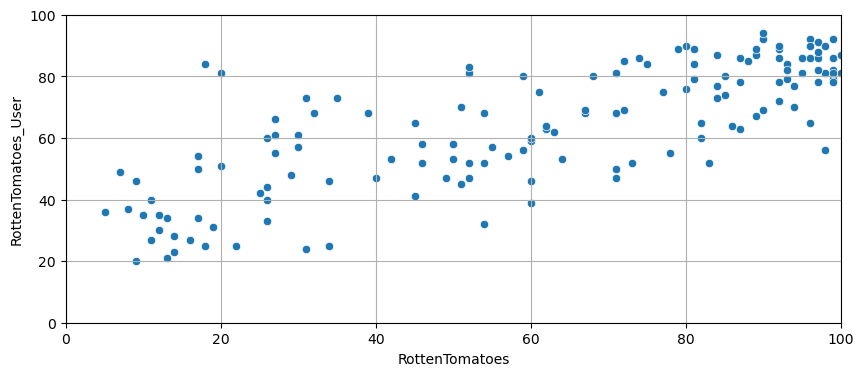

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график рассеяния (между двумя переменными)
sns.scatterplot(data=all_df, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(axis='both')

Изучим численную разницу между этими двумя рейтингами. Посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

In [5]:
# Найти разницу между колонками 'RottenTomatoes' и 'RottenTomatoes_User'
rotten_diff = all_df['RottenTomatoes'] - all_df['RottenTomatoes_User']
# Добавить в DataFrame новую колонку
all_df['Rotten_Diff'] = rotten_diff
all_df['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

Теперь посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом, получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

In [6]:
# Найти среднее абсолютное значение по колонке 'Rotten_Diff'
all_df['Rotten_Diff'].apply(abs).mean()

15.095890410958905

**Построим график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes. На этом графике будут отрицательные значения. Для отображения этого распределения будем использовать как KDE, так и гистограммы.**

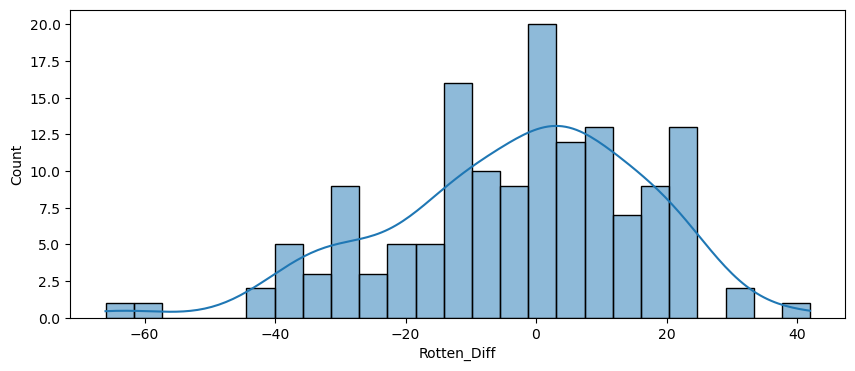

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график распределения 'Histogram'
sns.histplot(
    data=all_df,
    x='Rotten_Diff',
    # количество интервалов
    bins=25,
    # нарисовать график ~ оценка распределения вероятности
    kde=True
);

**Далее построим график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

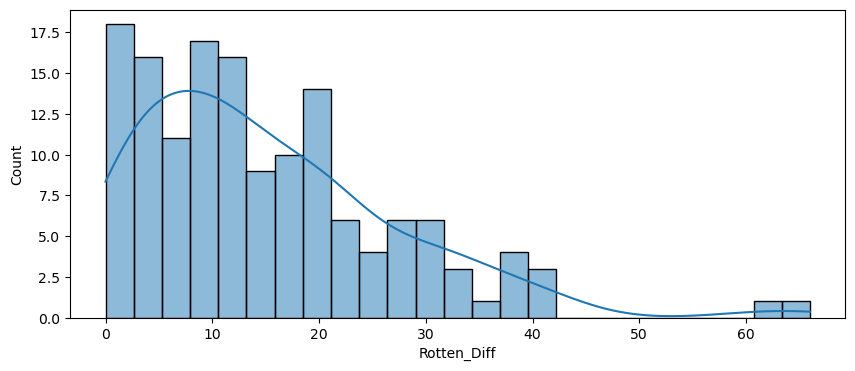

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график распределения 'Histogram',
# абсолютных значений из колонки 'Rotten_Diff'
sns.histplot(
    #data=all_df,
    x=all_df['Rotten_Diff'].apply(abs),
    # количество интервалов
    bins=25,
    # нарисовать график ~ оценка распределения вероятности
    kde=True
);

**Выясним, какие фильмы наиболее отличаются по рейтингам. Сначала найдем 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов. Поскольку разницу рейтингов вычислялась по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

**Какие 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [9]:
# Найти 5 фильмов с наименьшими значениями в колонке 'Rotten_Diff'
all_df.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Наоборот - найдем 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.**

In [10]:
# Найти 5 фильмов с наибольшими значениями в колонке 'Rotten_Diff'
all_df.nlargest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Рейтинги от MetaCritic

Далее посмотрим на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

**Построим график scatterplot для сравнения рейтингов Metacritic и Metacritic User.**

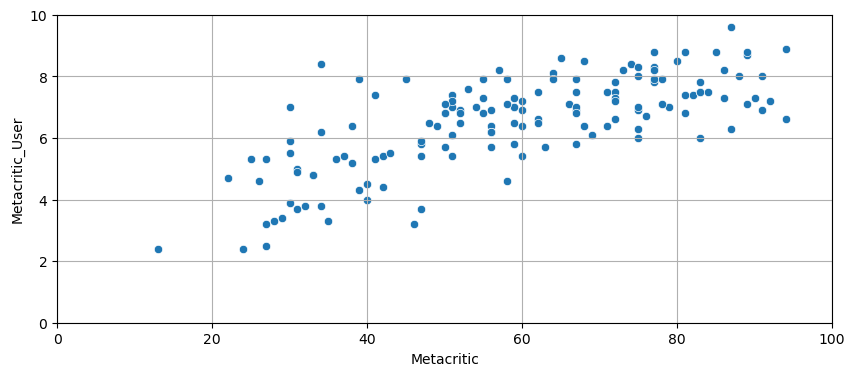

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график рассеяния (между двумя переменными)
sns.scatterplot(data=all_df, x='Metacritic', y='Metacritic_User')
plt.xlim(0, 100)
plt.ylim(0, 10)
plt.grid(axis='both');

## Рейтинги от IMDB

Теперь, посмотрим на рейтинги от IMDB. Здесь нужно учитывать, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

**Построим график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

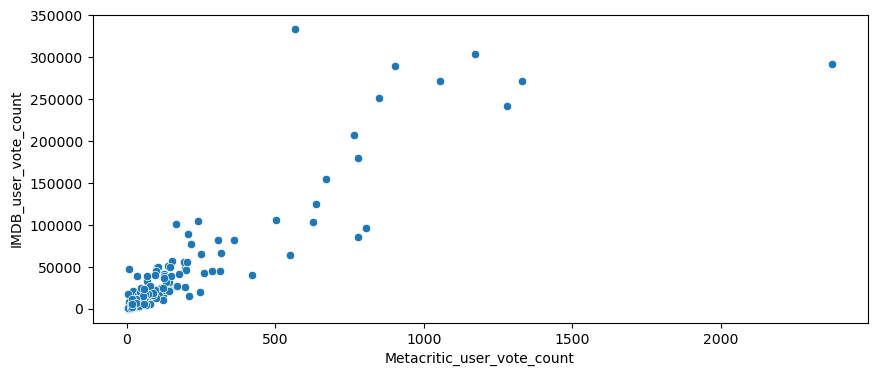

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график рассеяния (между двумя переменными)
sns.scatterplot(data=all_df, x='Metacritic_user_vote_count', y='IMDB_user_vote_count');

**Здесь отчетливо видно два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic.**

Найдем этот фильм

In [13]:
# Найти какой фильм получил наибольшее количество голосов от IMDB
all_df.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Найдем какой фильм получил наибольшее количество голосов на Metacritic?**

In [14]:
# Найти какой фильм получил наибольшее количество голосов от Metacritic
all_df.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9
